In [9]:
import pandas as pd

In [10]:
# Read the CSV as a single column
df = pd.read_csv("scheduling_results_4_classes_cleaned_18-02-2025.csv", header=None)

# Split into multiple columns using the semicolon as a delimiter
df = df[0].str.split(';', expand=True)

In [11]:
# Assign proper column names
df.columns = ['instance', 'jobs', 'machines', 'strategy', 'tw', 'compression', 
              'overlapping', '#op_tw_with_overlap', '#op_tw', '#op_only_overlap', 'makespan', 'gap_to_opt_percent', 'opt_class']

# Verify the DataFrame
print(df.head())

  instance jobs machines strategy tw compression overlapping  \
0     TA51   50       15    EST-M  2         Yes          No   
1     TA52   50       15    EST-M  2         Yes          No   
2     TA53   50       15    EST-M  2         Yes          No   
3     TA54   50       15    EST-M  2         Yes          No   
4     TA55   50       15    EST-M  2         Yes          No   

  #op_tw_with_overlap #op_tw #op_only_overlap makespan gap_to_opt_percent  \
0                 375    375                0     3070                 11   
1                 375    375                0     3128                 13   
2                 375    375                0     2956                  9   
3                 375    375                0     3039                  7   
4                 375    375                0     2998                 12   

  opt_class  
0         1  
1         1  
2         1  
3         1  
4         1  


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
# Convert numeric columns to appropriate types
numeric_cols = ['jobs', 'machines', 'tw', '#op_tw_with_overlap', '#op_tw', '#op_only_overlap', 'makespan', 'gap_to_opt_percent']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Encode categorical variables (e.g., 'strategy', 'compression', 'overlapping')
label_encoder = LabelEncoder()
categorical_cols = ['strategy', 'compression', 'overlapping', 'opt_class']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Define the features (X) and the target variable (y)
x = df[['jobs', 'machines', 'strategy', 'tw', 'compression', 'overlapping', '#op_tw_with_overlap', '#op_tw', '#op_only_overlap']]
y = df['opt_class']  # Target variable for classification

In [14]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Train the Boosted Classification Trees (Gradient Boosting)
boosted_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform 10-fold cross-validation on the entire dataset before fitting
cv_scores = cross_val_score(boosted_classifier, x, y, cv=10, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

boosted_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = boosted_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.64316239 0.67307692 0.38247863 0.40598291 0.65811966 0.65598291
 0.54700855 0.5        0.6474359  0.5042735 ]
Mean Accuracy from Cross-Validation: 0.5617521367521368
Accuracy: 0.7606837606837606

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       448
           1       0.68      0.74      0.71       349
           2       0.55      0.25      0.34       112
           3       1.00      0.59      0.74        27

    accuracy                           0.76       936
   macro avg       0.77      0.62      0.67       936
weighted avg       0.75      0.76      0.75       936



C:\Users\Mohammed El-Kholany\AppData\Local\Temp\ipykernel_18648\3502629826.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


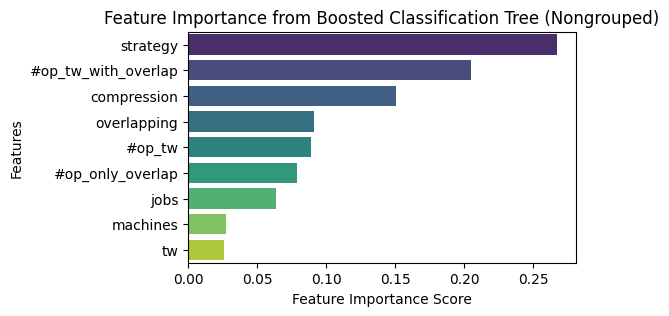

In [35]:
# Feature Importance Analysis
feature_importances = boosted_classifier.feature_importances_
features = x.columns
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(5, 3))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Boosted Classification Tree (Nongrouped)")
plt.show()